<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Trabajo Práctico Nº2
#### Alumno:    Fernando Daniel Fiamberti


# <span style="color:Blue">Introducción</span>

Mediante el generador de señales senoidales configurable realizado en la tarea anterior,
se debe graficar la DFT de la señal generada.


 
# <span style="color:Blue">Enunciado</span>

Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT).

$X_k=\sum_{n=0}^{N-1}x_n.e^{-j\,2\pi.k.n/N}$

XX = mi_funcion_DFT( xx )

xx: señal a analizar, una matriz (Nx1) de números reales. 

XX: DFT de xx, una matriz (Nx1) de números complejos.




# Desarrollo de la tarea

### <span style="color:Blue">Código implementado:</span>


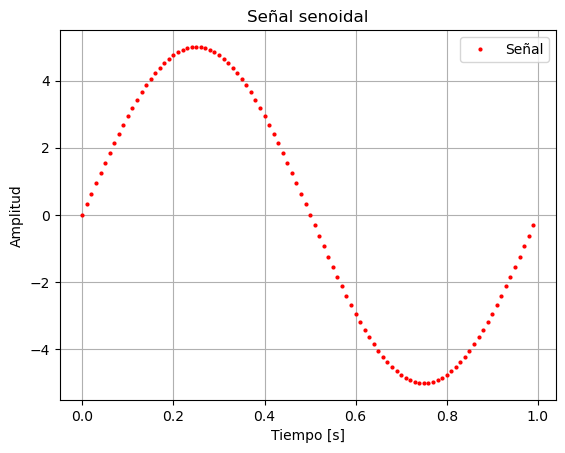

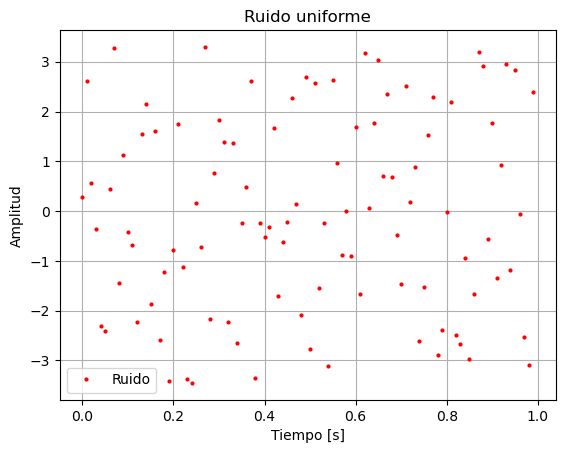

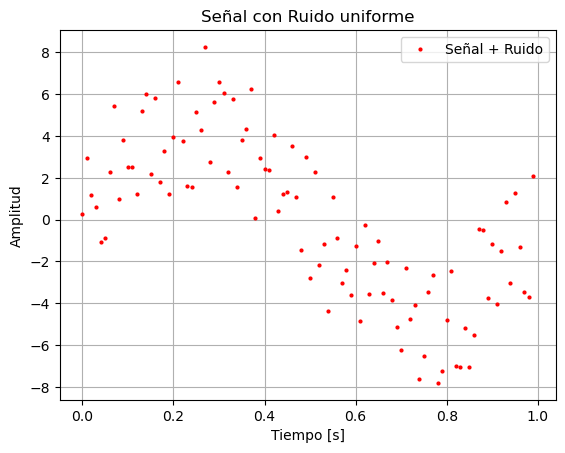

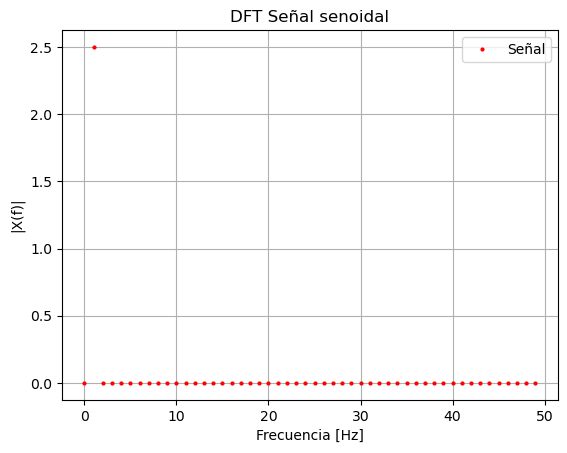

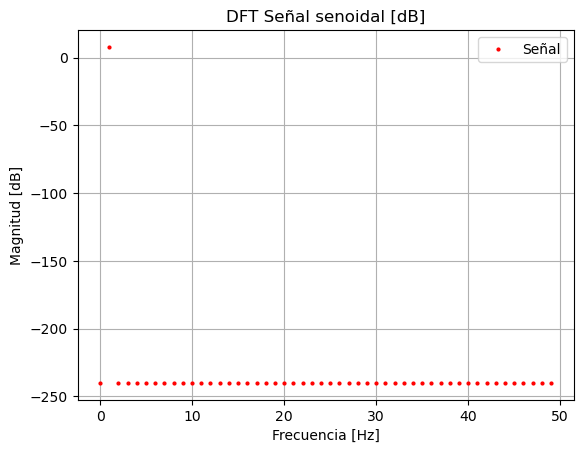

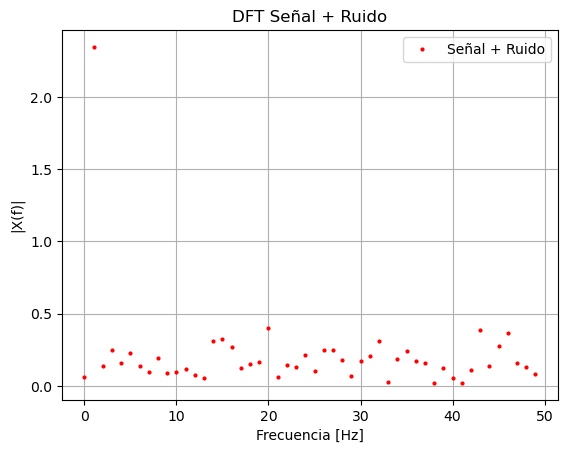

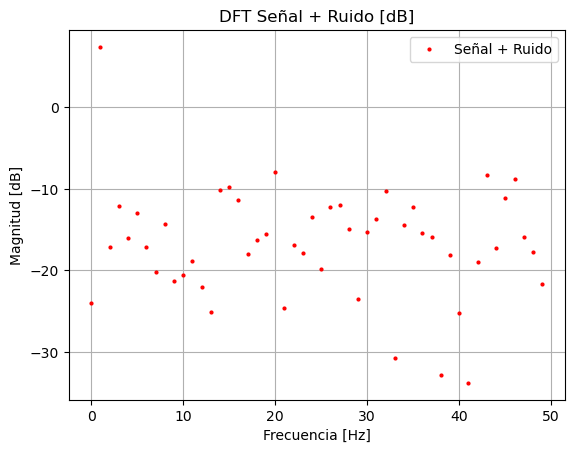

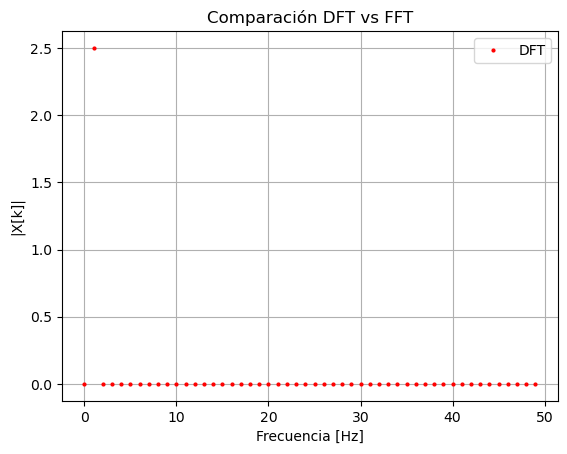

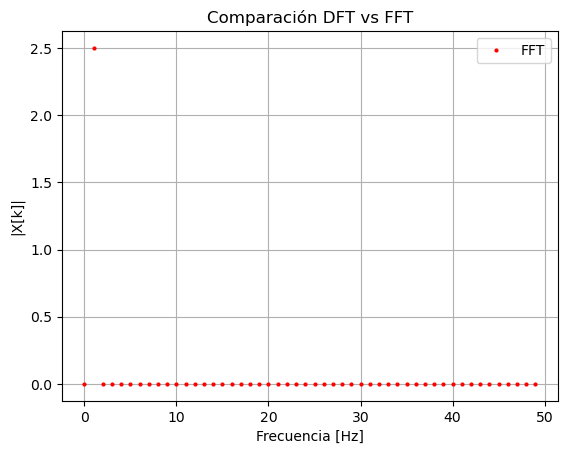

 
Media teórica: 0
Media experimental: -0.063
Varianza teórica: 4
Varianza experimental: 3.827


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
    1) Se genera una señal senoidal a partir de los parámetros recibidos.

    2) Se genera ruido uniforme y ruido gaussiano.

    3) Se suma el ruido a la señal senoidal generada.

    4) Se calcula la DFT de la señal senoidal + el ruido.
    

Created on Mon Sep 8 19:17:10 2025

@author: Fernando Daniel Fiamberti
"""
import numpy as np
import matplotlib.pyplot as plt



"""
Parámetros de la señal senoidal:

      ax:     Amplitud máxima de la señal [V]
      
      dc:     Valor medio de la señal [V]
      
      fx:     Frecuencia de la señal [Hz]
      
      ph:     Fase de la señal [rad]
      
      N :     Número de muestras
      
      fs:     Frecuencia de muestreo del ADC [Hz]
      
      Ts:     Período de muestreo [s]       
      
      T_sim:  Tiempo que dura la simulación [s]


Devuelve:

      tt : Tiempo correspondiente a cada muestra
      
      xx : Señal senoidal generada
""" 





"""
Parámetros de la DFT:

       x: Señal muestreada 

Devuelve:
      
       X : DFT de la señal, matriz (Nx1) de números complejos.
""" 




# --- Función senoidal ---
def generador_senoidal(ax, dc, fx, ph, N, fs):

    # Genera el vector de tiempo
    tt = np.arange(start = 0, stop = T_sim, step =  1/fs)

    # Crea la señal senoidal
    xx = ax * np.sin(2 * np.pi * fx * tt + ph) + dc

    return tt, xx






# --- Función para generar ruido ---
def generar_ruido(N, sigma_cuadrado=4, tipo="uniforme"):
    if tipo == "uniforme":
        delta = np.sqrt(12 * sigma_cuadrado)  # b - a
        a = -delta/2
        b = delta/2
        ruido = np.random.uniform(a, b, size=N)
    elif tipo == "gaussiano":
        sigma = np.sqrt(sigma_cuadrado)
        ruido = np.random.normal(0, sigma, size=N)
    else:
        raise ValueError("El tipo de ruido debe ser 'uniforme' o 'gaussiano'")
    return ruido








# --- Gráfico de la señal senoidal generada ---
def Senoidal_t(tt,xx):
    plt.figure()
#     plt.vlines(tt, ymin=0, ymax=xx, color='blue', label="Señal senoidal") # lìneas verticales 
    plt.plot(tt, xx, 'o', color='red', markersize=2, label="Señal")  # marcar la punta de cada palito
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.title("Señal senoidal")
    plt.grid(True)
    plt.legend()
    plt.show()




# --- Gráfico del ruido generado ---
def ruido_t(tt,ruido,tipo_ruido):
    plt.figure()
#     plt.vlines(tt, ymin=0, ymax=ruido, color='blue', label="Ruido") # lìneas verticales
    plt.plot(tt, ruido, 'o', color='red', markersize=2, label="Ruido")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.title(f"Ruido {tipo_ruido}")
    plt.grid(True)
    plt.legend()
    plt.show()


# --- Gráfico de la señal senoidal generada con el ruido sumado ---
def Senoidal_y_ruido_t(tt, senal_ruidosa):
    plt.figure()
#     plt.vlines(tt, ymin=0, ymax=senal_ruidosa, color='blue', label="Señal + Ruido") # lìneas verticales
    plt.plot(tt, senal_ruidosa, 'o', color='red', markersize=2,label="Señal + Ruido")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.title(f"Señal con Ruido {tipo_ruido}")
    plt.grid(True)
    plt.legend()
    plt.show()





# --- Grafico la DFT de la señal senoidal generada (sin ruido) ---
def dft_Señal(f_sen, S_sen):
    plt.figure()
#     plt.vlines(f_sen, ymin=0, ymax=S_sen, color='blue', label="Señal senoidal") # lìneas verticales
    plt.plot(f_sen, S_sen, 'o', color='red', markersize=2, label="Señal")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X(f)|")
    plt.title("DFT Señal senoidal")
    plt.grid(True)
    plt.legend()
    plt.show()





# --- Grafico la DFT y la FFT de la señal senoidal generada en el mismo gráfico ---
def DFT_y_FFT(f_sen, S_sen):
    plt.figure()
    plt.plot(f_sen, S_sen, 'o', color='red', markersize=2, label="DFT")
    plt.title("Comparación DFT vs FFT")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X[k]|")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure()
    plt.plot(freqs_fft[:N//2],np.abs(X_fft[:N//2]), 'o', color='red', markersize=2, label="FFT")
    plt.title("Comparación DFT vs FFT")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X[k]|")
    plt.legend()
    plt.grid()
    plt.show()






# --- Grafico la DFT de la señal senoidal generada [dB] (sin ruido) ---
def dft_Señal_dB(f_sen, S_sen):
    plt.figure()
#    plt.vlines(f_sen, ymin=0, ymax= to_dB(S_sen), color='blue', label="Señal senoidal") # lìneas verticales
    plt.plot(f_sen, to_dB(S_sen), 'o', color='red', markersize=2, label="Señal")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Magnitud [dB]")
    plt.title("DFT Señal senoidal [dB]")
    plt.grid(True)
    plt.legend()
    plt.show()




# --- Grafico la DFT de la señal + ruido ---
def dft_Señal_y_ruido(f_sum, S_sum):
    plt.figure()
#    plt.vlines(f_sum, ymin=0, ymax= S_sum, color='blue', label="DFT Señal + Ruido ") # lìneas verticales
    plt.plot(f_sum, S_sum, 'o', color='red', markersize=2, label="Señal + Ruido")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X(f)|")
    plt.title("DFT Señal + Ruido")
    plt.grid(True)
    plt.legend()
    plt.show()


# --- Grafico la DFT de la señal + ruido [dB] ---
def dft_Señal_y_ruido_dB(f_sum, S_sum):
    plt.figure()
 #    plt.vlines(f_sum, ymin=0, ymax= to_dB(S_sum), color='blue', label="DFT Señal + Ruido [dB]") # lìneas verticales
    plt.plot(f_sum, to_dB(S_sum), 'o', color='red', markersize=2, label="Señal + Ruido")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Magnitud [dB]")
    plt.title("DFT Señal + Ruido [dB]")
    plt.grid(True)
    plt.legend()
    plt.show()




# --- DFT ---
def dft(x, fs):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(W, x)
    X = np.abs(X) / N  # magnitud normalizada
    f = np.arange(N) * fs / N
    mitad = N // 2
    return f[:mitad], X[:mitad]



# --- Conversión a dB ---
def to_dB(X, eps=1e-12):
    return 20 * np.log10(X + eps)






# --- Parámetros de la señal ---
ax = 5                # Amplitud    [v]
dc = 0                # Valor medio [v]
fx = 1                # Frecuencia  [Hz]
ph = 0                # Fase        [rad]


# --- Parámetros de muestreo ---
fs = 100              # Frec. de muestreo    [Hz]
N = fs                # Número de muestras
Ts = 1/fs             # Período de muestreo  [s]
T_sim = N * Ts        # Tiempo de simulación [s]



# --- Parámetros del ruido ---
sigma_cuadrado = 4
tipo_ruido = "uniforme"
# tipo_ruido = "gaussiano"




# --- Generar señal y ruido ---
tt, xx = generador_senoidal(ax, dc, fx, ph, N, fs)
ruido = generar_ruido(len(tt), sigma_cuadrado, tipo_ruido)
senal_ruidosa = xx + ruido



# --- Calcular DFTs ---
f_sen, S_sen = dft(xx, fs)
f_rui, S_rui = dft(ruido, fs)
f_sum, S_sum = dft(senal_ruidosa, fs)


#    Calculo la  FFT (numpy) y normalizo por N
freqs = np.fft.fftfreq(N,1/fs)
X_fft = np.fft.fft(xx, N) / N
freqs_fft = np.fft.fftfreq(N, 1/fs)

# Tomo solo la parte positiva
half_N = N//2   # hasta la mitad
freqs_pos = freqs[:half_N]
X_fft_pos = X_fft[:half_N]




# --- Gráfico de la señal senoidal generada ---
Senoidal_t(tt,xx)


# --- Gráfico del ruido generado ---
ruido_t(tt,ruido,tipo_ruido)


# --- Gráfico de la señal senoidal generada con el ruido sumado ---
Senoidal_y_ruido_t(tt, senal_ruidosa)


# --- Grafico la DFT de la señal senoidal generada ---
dft_Señal(f_sen, S_sen)



# --- Grafico la DFT de la señal generada [dB] ---
dft_Señal_dB(f_sen, S_sen)


# --- Grafico la DFT de la señal + ruido ---
dft_Señal_y_ruido(f_sum, S_sum)



# --- Grafico la DFT de la señal + ruido [dB] ---
dft_Señal_y_ruido_dB(f_sum, S_sum)

# --- Grafico la DFT y la FFT de la señal ---
DFT_y_FFT(f_sen, S_sen)



# --- Estadística ---
media_exp = np.mean(ruido)
var_exp = np.var(ruido)

print(" ")
print("Media teórica: 0")
print(f"Media experimental: {media_exp:.3f}")
print(f"Varianza teórica: {sigma_cuadrado}")
print(f"Varianza experimental: {var_exp:.3f}")






La DFT compara la señal original con senoidales base: senos y cosenos de diferentes frecuencias. 
Una senoidal muestreada puede verse como puntos girando en un círculo, eso es un número complejo de la forma: $e^{-j\,2\pi.k.n/N}$   Esto es un vector unitario girando en el círculo círculo unitario con:

***n***: el tiempo/muestra

***k***: la frecuencia que estamos "probando"

***N***: cantidad total de muestras

Cada frecuencia base de la DFT es como una rotación uniforme alrededor del círculo.

k=1, la rotación da una vuelta completa en N muestras.

k=2, da dos vueltas, y así sucesivamente.

De esta forma, la DFT compara la señal con estos ***"vectores giratorios"***, con lo cual 
compara punto a punto con senoidales muestreadas.

# <span style="color:Blue">Conclusiones obtenidas graficando la DFT de la señal

# <span style="color:Green">DFT de la senoidal con f = 1 Hz muestreada a fs = 100 Hz</span>

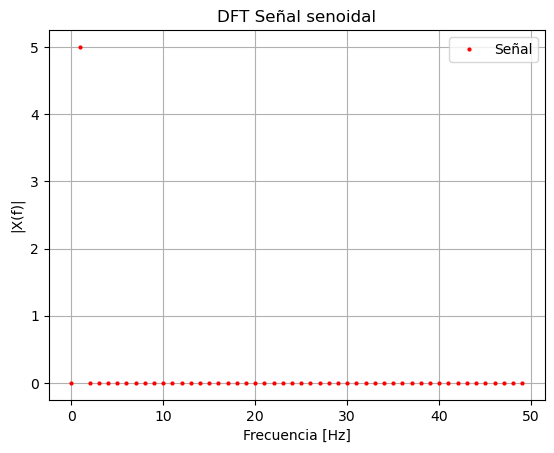

In [2]:
# Parámetros de la señal
ax = 10               # Amplitud    [v]
dc = 0                # Valor medio [v]
fx = 1               # Frecuencia  [Hz]
ph = 0                # Fase        [rad]

# --- Parámetros de muestreo ---
fs = 100             # Frec. de muestreo    [Hz]
N = fs                # Número de muestras
Ts = 1/fs             # Período de muestreo  [s]
T_sim = N * Ts        # Tiempo de simulación [s]


# --- Generar señal ---
tt, xx = generador_senoidal(ax, dc, fx, ph, N, fs)


# --- Calcular DFTs ---
f_sen, S_sen = dft(xx, fs)


# --- Grafico la DFT de la señal senoidal generada ---
dft_Señal(f_sen, S_sen)

Se observa que la amplitud de la señal en el espectro es la mitad de ax. Esto se debe a que estoy graficando solo la parte positiva.Al ser solo la mitad del espectro, la energía contenida es la mitad de la total. 

# <span style="color:Green">DFT de la senoidal con f = 1,7 Hz muestreada a fs = 100 Hz</span>

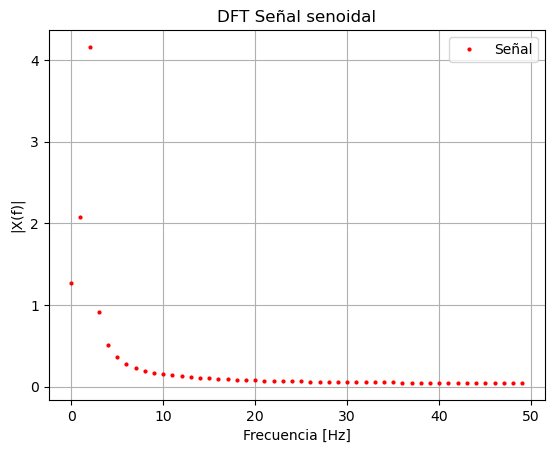

In [3]:
# Parámetros de la señal
ax = 10               # Amplitud    [v]
dc = 0                # Valor medio [v]
fx = 1.7               # Frecuencia  [Hz]
ph = 0                # Fase        [rad]

# --- Parámetros de muestreo ---
fs = 100             # Frec. de muestreo    [Hz]
N = fs                # Número de muestras
Ts = 1/fs             # Período de muestreo  [s]
T_sim = N * Ts        # Tiempo de simulación [s]


# --- Generar señal ---
tt, xx = generador_senoidal(ax, dc, fx, ph, N, fs)


# --- Calcular DFTs ---
f_sen, S_sen = dft(xx, fs)


# --- Grafico la DFT de la señal senoidal generada ---
dft_Señal(f_sen, S_sen)

Se observa que aparece energía en frecuencias cercanas a la de la señal senoidal generada. 
Este efecto se denomina ***leakage o fuga espectral***. 
Se debe a que la señal en el tiempo no entra un número entero en la ventana de observación de N muestras.Esto está directamente relacionado con el ***truncado temporal de la señal***.Al tomar una ventana finita se está multiplicando la señal por una ventana rectangular en el tiempo:

$x_{\text{vent}}(t) = x(t) \cdot w(t)$

donde $w(t)$ es una ventana rectangular.

Multiplicación en tiempo → Convolución en frecuencia

Según la propiedad de la transformada de Fourier:

$x(t) \cdot w(t) \xrightarrow{\mathcal{F}} X(f) * W(f)$

Significa:

- Multiplicar la señal por una ventana en el tiempo => **truncarla**,
- Es equivalente a **convolucionar su espectro** con el espectro de la ventana.

¿Qué implica esta convolución?

- El espectro de una ventana rectangular es una función **sinc**.
- Al convolucionar el espectro original con una sinc:
  - El pico espectral **se ensancha**.
  - Aparecen **lóbulos secundarios**.
  - Aparece el **leakage**.


# <span style="color:Green">Comparación de la DFT de la senoidal con su FFT</span>

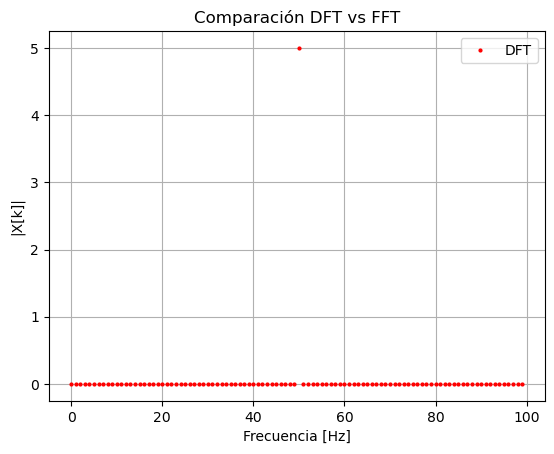

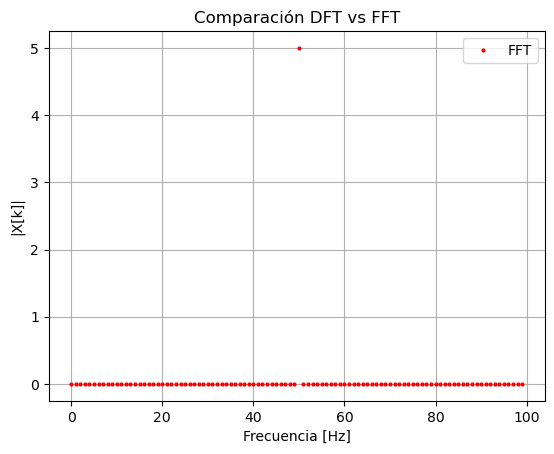

In [4]:
# Parámetros de la señal
ax = 10               # Amplitud    [v]
dc = 0                # Valor medio [v]
fx = 50               # Frecuencia  [Hz]
ph = 0                # Fase        [rad]

# --- Parámetros de muestreo ---
fs = 200             # Frec. de muestreo    [Hz]
N = fs                # Número de muestras
Ts = 1/fs             # Período de muestreo  [s]
T_sim = N * Ts        # Tiempo de simulación [s]


# --- Generar señal y ruido ---
tt, xx = generador_senoidal(ax, dc, fx, ph, N, fs)


# --- Calcular DFTs ---
f_sen, S_sen = dft(xx, fs)


#    Calculo la  FFT (numpy) y normalizo por N
freqs = np.fft.fftfreq(N,1/fs)
X_fft = np.fft.fft(xx, N) / N
freqs_fft = np.fft.fftfreq(N, 1/fs)

#    Tomo solo la parte positiva
half_N = N//2   # hasta la mitad
freqs_pos = freqs[:half_N]
X_fft_pos = X_fft[:half_N]


# --- Grafico la DFT y la FFT de la señal ---
DFT_y_FFT(f_sen, S_sen)


iSe observa que el espectro es exactamente el mismo si se realiza la DFT o la FFT. Salvo que la FFT no se normalice por N (o sea dividirla por N). En ese caso la amplitud no será la de la señal senoidal obtenida en la realidad. El espectro da exactamente igual, pero si cambio la fs y la aumento mucho más, al correr la función DFT tarda mucho más en calcularla y graficarla que la FFT. 

La **FFT**:
- Usa la **simetría** y la **periodicidad** de los factores exponenciales:  $e^{-j\,2\pi.k.n/N}$
- Reorganiza la DFT en bloques más pequeños

### Comparación de la DFT con la FFT:

La **DFT** requiere:  $(N^2)$ operaciones.

La **FFT** se reduce a:  $(N \log N)$ operaciones.



# <span style="color:Blue">Conclusiones obtenidas graficando la DFT de la señal con y sin ruido</span>

### <span style="color:Green">Senoidal de frecuencia = 1Hz, muestreada a 3000 Hz</span>

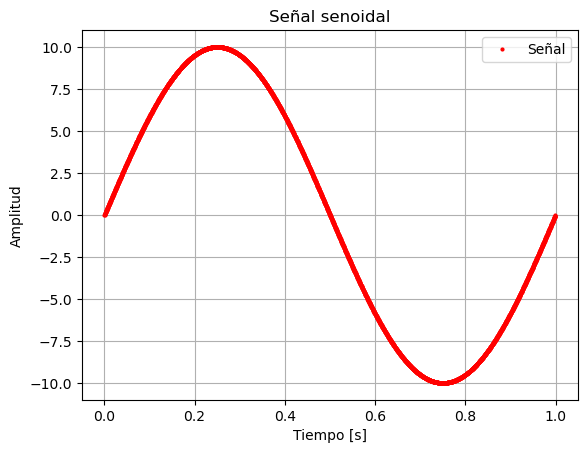

In [5]:

# Parámetros de la señal
ax = 10               # Amplitud    [v]
fx = 1                # Frecuencia  [Hz]

# Parámetros de muestreo
fs = 3000              # Frec. de muestreo    [Hz]
N = fs                # Número de muestras
Ts = 1/fs             # Período de muestreo  [s]
T_sim = N * Ts        # Tiempo de simulación [s]

# --- Generar señal ---
tt, xx = generador_senoidal(ax, dc, fx, ph, N, fs)

# --- Gráfico de la señal senoidal generada ---
Senoidal_t(tt,xx)


# <span style="color:Green">Senoidal + Ruido uniforme</span>

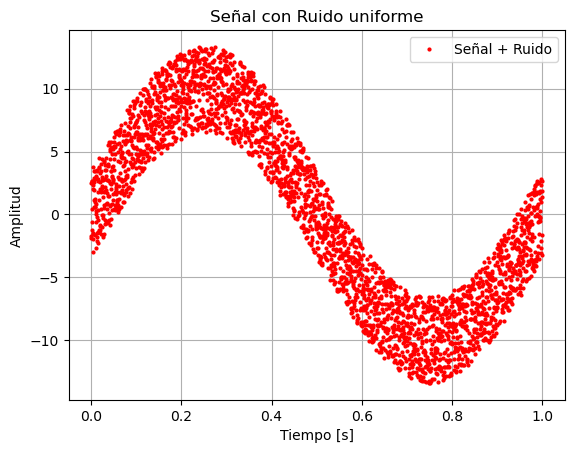

In [6]:
# Parámetros de la señal
ax = 10               # Amplitud    [v]
dc = 0                # Valor medio [v]
fx = 1               # Frecuencia  [Hz]
ph = 0                # Fase        [rad]

# --- Parámetros de muestreo ---
fs = 3000             # Frec. de muestreo    [Hz]
N = fs                # Número de muestras
Ts = 1/fs             # Período de muestreo  [s]
T_sim = N * Ts        # Tiempo de simulación [s]


# --- Parámetros del ruido ---
sigma_cuadrado = 4
tipo_ruido = "uniforme"
# tipo_ruido = "gaussiano"




# --- Generar señal y ruido ---
tt, xx = generador_senoidal(ax, dc, fx, ph, N, fs)
ruido = generar_ruido(len(tt), sigma_cuadrado, tipo_ruido)
senal_ruidosa = xx + ruido



# --- Calcular DFTs ---
f_sen, S_sen = dft(xx, fs)
f_rui, S_rui = dft(ruido, fs)
f_sum, S_sum = dft(senal_ruidosa, fs)


# --- Gráfico de la señal senoidal generada con el ruido sumado ---
Senoidal_y_ruido_t(tt, senal_ruidosa)


# <span style="color:Green">Senoidal + Ruido gaussiano</span>

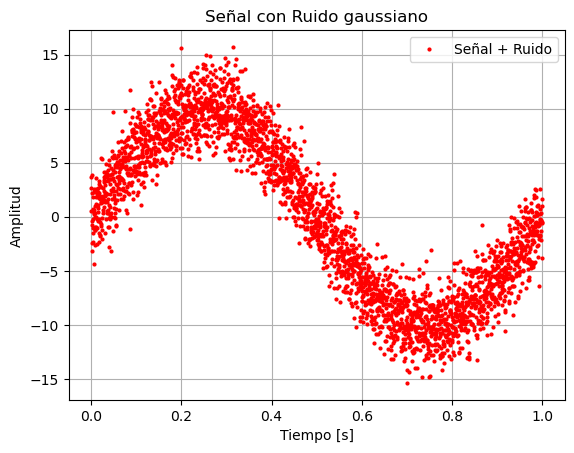

In [7]:
# Parámetros de la señal
ax = 10               # Amplitud    [v]
dc = 0                # Valor medio [v]
fx = 1               # Frecuencia  [Hz]
ph = 0                # Fase        [rad]

# --- Parámetros de muestreo ---
fs = 3000             # Frec. de muestreo    [Hz]
N = fs                # Número de muestras
Ts = 1/fs             # Período de muestreo  [s]
T_sim = N * Ts        # Tiempo de simulación [s]


# --- Parámetros del ruido ---
sigma_cuadrado = 4
# tipo_ruido = "uniforme"
tipo_ruido = "gaussiano"




# --- Generar señal y ruido ---
tt, xx = generador_senoidal(ax, dc, fx, ph, N, fs)
ruido = generar_ruido(len(tt), sigma_cuadrado, tipo_ruido)
senal_ruidosa = xx + ruido



# --- Calcular DFTs ---
f_sen, S_sen = dft(xx, fs)
f_rui, S_rui = dft(ruido, fs)
f_sum, S_sum = dft(senal_ruidosa, fs)


# --- Gráfico de la señal senoidal generada con el ruido sumado ---
Senoidal_y_ruido_t(tt, senal_ruidosa)


## Diferencias observadas entre el ruido uniforme y el ruido gaussiano en el tiempo

- **Ruido uniforme**
  - Todos los valores dentro de un rango tienen la misma probabilidad de aparecer.
  
 
- **Ruido gaussiano**
  - Los valores cercanos a la media ocurren con mayor probabilidad.
  - Se observan valores cercanos a la senoidal y picos de ruido alrededor.
 

# <span style="color:Green">DFT de la Senoidal + Ruido uniforme</span>

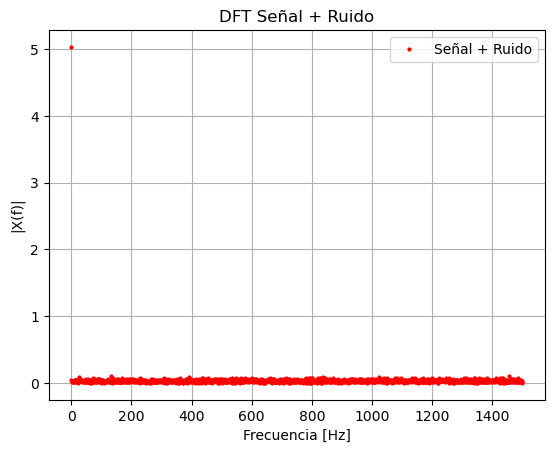

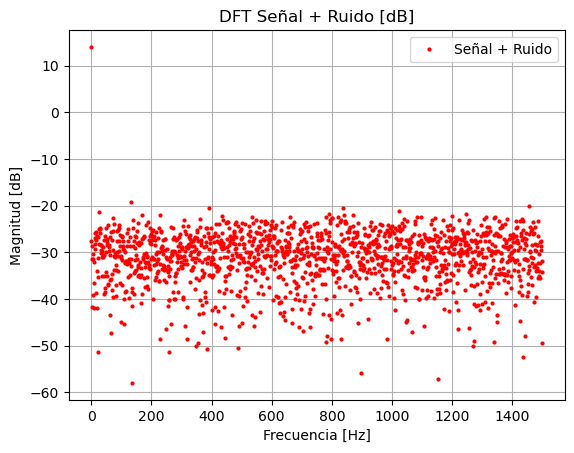

In [8]:
# Parámetros de la señal
ax = 10               # Amplitud    [v]
dc = 0                # Valor medio [v]
fx = 1               # Frecuencia  [Hz]
ph = 0                # Fase        [rad]

# --- Parámetros de muestreo ---
fs = 3000             # Frec. de muestreo    [Hz]
N = fs                # Número de muestras
Ts = 1/fs             # Período de muestreo  [s]
T_sim = N * Ts        # Tiempo de simulación [s]


# --- Parámetros del ruido ---
sigma_cuadrado = 4
tipo_ruido = "uniforme"
# tipo_ruido = "gaussiano"




# --- Generar señal y ruido ---
tt, xx = generador_senoidal(ax, dc, fx, ph, N, fs)
ruido = generar_ruido(len(tt), sigma_cuadrado, tipo_ruido)
senal_ruidosa = xx + ruido



# --- Calcular DFTs ---
f_sen, S_sen = dft(xx, fs)
f_rui, S_rui = dft(ruido, fs)
f_sum, S_sum = dft(senal_ruidosa, fs)



# --- Grafico la DFT de la señal + ruido ---
dft_Señal_y_ruido(f_sum, S_sum)



# --- Grafico la DFT de la señal + ruido [dB] ---
dft_Señal_y_ruido_dB(f_sum, S_sum)



# <span style="color:Green">DFT de la Senoidal + Ruido gaussiano</span>

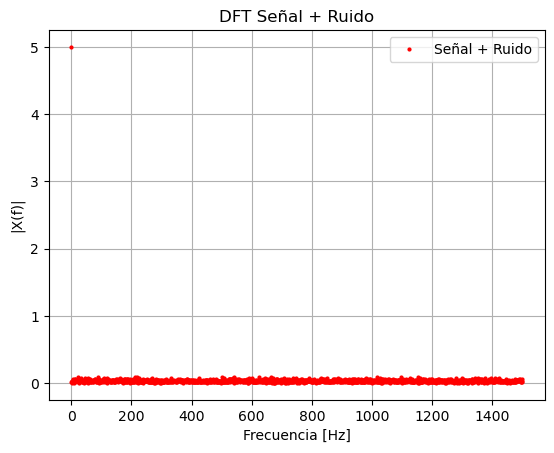

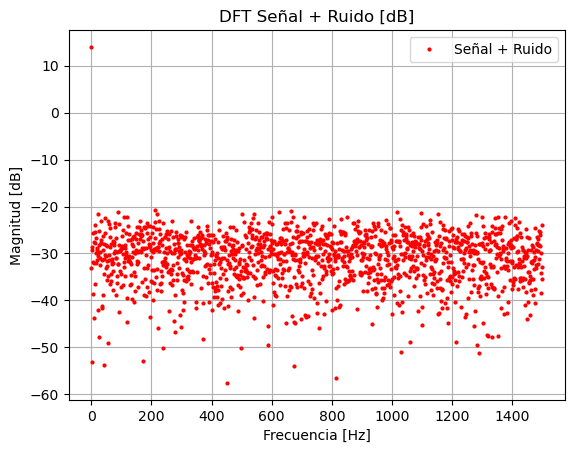

In [9]:
# Parámetros de la señal
ax = 10               # Amplitud    [v]
dc = 0                # Valor medio [v]
fx = 1               # Frecuencia  [Hz]
ph = 0                # Fase        [rad]

# --- Parámetros de muestreo ---
fs = 3000             # Frec. de muestreo    [Hz]
N = fs                # Número de muestras
Ts = 1/fs             # Período de muestreo  [s]
T_sim = N * Ts        # Tiempo de simulación [s]


# --- Parámetros del ruido ---
sigma_cuadrado = 4
# tipo_ruido = "uniforme"
tipo_ruido = "gaussiano"




# --- Generar señal y ruido ---
tt, xx = generador_senoidal(ax, dc, fx, ph, N, fs)
ruido = generar_ruido(len(tt), sigma_cuadrado, tipo_ruido)
senal_ruidosa = xx + ruido



# --- Calcular DFTs ---
f_sen, S_sen = dft(xx, fs)
f_rui, S_rui = dft(ruido, fs)
f_sum, S_sum = dft(senal_ruidosa, fs)



# --- Grafico la DFT de la señal + ruido ---
dft_Señal_y_ruido(f_sum, S_sum)



# --- Grafico la DFT de la señal + ruido [dB] ---
dft_Señal_y_ruido_dB(f_sum, S_sum)



## Diferencias entre los espectros del ruido uniforme y del ruido gaussiano

- **Ruido uniforme**
  - En el dominio de la frecuencia, su espectro tiende a ser casi plano.
  - La energía se reparte de forma relativamente homogénea en todas las frecuencias.

- **Ruido gaussiano**
  - También tiende a ser un espectro casi plano.
  - La energía se reparte de forma relativamente homogénea en todas las frecuencias, apareciendo algunos picos más       que en el ruido uniforme.
 
***Conclusión***: La diferencia está en la **estadística temporal** (la distribución de amplitudes) más que en el espectro.
